<font color = '#FFA500'><b>Kaggle Competition Link:</b> https://www.kaggle.com/competitions/target-marketing-for-canadian-bank-fall2023</font>

<center><font color = '#FFA500' size = '8%'>Importing Libraries</font></center>

In [1]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras import layers

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# import category_encoders as ce
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Flatten

import os
import matplotlib.cm as cm
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, mean_squared_error, mean_absolute_error, r2_score

import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import itertools

<center><font color = '#FFA500' size = '8%'>Importing Libraries</font></center>

* Dataset have 63999 rows and 37 features


In [3]:
df = pd.read_csv('train.csv') # Training Dataset.
df_test = pd.read_csv('test.csv') # Testing Dataset.

In [4]:
# First look on our train dataset.
df

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,CTSP063995,0,40444.92,0,0,1,0,1,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
63995,CTSP063996,0,47395.91,0,0,0,0,0,0,0,...,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63996,CTSP063997,1,10086.31,0,0,1,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63997,CTSP063998,0,26452.64,0,0,0,0,0,0,0,...,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125


In [5]:
# First look on our test dataset.
df_test

,Customer_id,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP063999,13341.55,0,0,0,0,0,0,0,0.0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,CTSP064000,18649.81,0,1,0,0,0,0,0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,CTSP064001,28311.30,0,1,0,0,1,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP064002,18066.61,0,1,0,0,0,0,0,0.0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,CTSP064003,10512.30,0,0,0,0,0,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,CTSP065474,16311.39,0,0,0,0,0,0,0,0.0,...,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
1476,CTSP065475,22990.01,0,0,0,0,0,0,0,0.0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1477,CTSP065476,16792.16,0,1,0,0,0,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
1478,CTSP065477,12151.15,0,1,0,0,0,0,0,0.0,...,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [6]:
# Columns that are common between train and test dataset.
df.columns.intersection(df_test.columns)

Index(['Customer_id', 'Balance', 'PreviousCampaignResult', 'Product1',
       'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')

In [7]:
# Columns that are unique between train and test dataset.
print(f'Number of unique fields between train and test datasets: {len(df.columns.union(df_test.columns)) - len(df.columns.intersection(df_test.columns))}')
print(f'Column: {df.columns.difference(df_test.columns)[0]}')

Number of unique fields between train and test datasets: 1
Column: Target


In [8]:
# Dropping unnecessary field.
df.drop(['Customer_id'], axis = 1, inplace = True)

<center><font color = '#FFA500' size = '8%'>Exploring Dataset</font></center>

In [9]:
# Finding insights on shape, features, Null values, and datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Target                       63999 non-null  int64  
 1   Balance                      63999 non-null  float64
 2   PreviousCampaignResult       63999 non-null  int64  
 3   Product1                     63999 non-null  int64  
 4   Product2                     63999 non-null  int64  
 5   Product3                     63999 non-null  int64  
 6   Product4                     63999 non-null  int64  
 7   Product5                     63999 non-null  int64  
 8   Product6                     63999 non-null  int64  
 9   Transaction1                 63999 non-null  float64
 10  Transaction2                 63999 non-null  float64
 11  Transaction3                 63999 non-null  float64
 12  Transaction4                 63999 non-null  float64
 13  Transaction5    

In [10]:
# Exploring the statistical values for the dataset.
df.describe()

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,...,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000
mean,0.499773,22697.014218,0.001484,0.200441,0.160456,0.001766,0.092158,0.022125,0.041876,312.852441,...,0.595291,1.379736,1.836435,1.391770,1.757322,1.882755,1.678434,1.412233,1.678434,1.315226
std,0.500004,10819.489043,0.039303,0.400333,0.367031,0.041983,0.289251,0.147092,0.200307,4932.061568,...,1.162643,0.206340,0.370122,0.161833,0.357483,0.516006,0.160600,0.575083,0.160600,0.106634
min,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,0.000000,13499.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,0.000000,19982.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,1.000000,30104.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,1.000000,50000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505000.000000,...,56.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


Checking Null Values.

In [11]:
df.isnull().sum()

Target                         0
Balance                        0
PreviousCampaignResult         0
Product1                       0
Product2                       0
Product3                       0
Product4                       0
Product5                       0
Product6                       0
Transaction1                   0
Transaction2                   0
Transaction3                   0
Transaction4                   0
Transaction5                   0
Transaction6                   0
Transaction7                   0
Transaction8                   0
Transaction9                   0
ExternalAccount1               0
ExternalAccount2               0
ExternalAccount3               0
ExternalAccount4               0
ExternalAccount5               0
ExternalAccount6               0
ExternalAccount7               0
ActivityIndicator              0
RegularInteractionIndicator    0
CompetitiveRate1               0
CompetitiveRate2               0
CompetitiveRate3               0
Competitiv

Cheking Unique Values

In [12]:
df.nunique()

Target                             2
Balance                        62830
PreviousCampaignResult             3
Product1                           2
Product2                           2
Product3                           2
Product4                           2
Product5                           2
Product6                           2
Transaction1                    1476
Transaction2                    1765
Transaction3                    4768
Transaction4                   16099
Transaction5                    9923
Transaction6                   15305
Transaction7                    2989
Transaction8                    4535
Transaction9                    4441
ExternalAccount1                   2
ExternalAccount2                   2
ExternalAccount3                   2
ExternalAccount4                   2
ExternalAccount5                   2
ExternalAccount6                   2
ExternalAccount7                   2
ActivityIndicator                611
RegularInteractionIndicator       26
C

<center><font color = '#FFA500' size = '6%'>Feature Differentiation - Categorical and Numerical</font></center>

Categorical Features:
- Target
- PreviousCampaignResult
- Product1
- Product2
- Product3
- Product4
- Product5
- Product6
- ExternalAccount1
- ExternalAccount2
- ExternalAccount3
- ExternalAccount4
- ExternalAccount5
- ExternalAccount6
- ExternalAccount7
- CompetitiveRate1
- CompetitiveRate2
- CompetitiveRate3
- CompetitiveRate4
- CompetitiveRate5
- CompetitiveRate6
- CompetitiveRate7
- RateBefore
- ReferenceRate

In [13]:
# Based on the unique values as shown above, we can categorize some variables as they are having no unique values greater 4.
categorical_features = []

for column in df.columns:
    if df[column].nunique() <= 4:
        categorical_features.append(column)

categorical_features

['Target',
 'PreviousCampaignResult',
 'Product1',
 'Product2',
 'Product3',
 'Product4',
 'Product5',
 'Product6',
 'ExternalAccount1',
 'ExternalAccount2',
 'ExternalAccount3',
 'ExternalAccount4',
 'ExternalAccount5',
 'ExternalAccount6',
 'ExternalAccount7',
 'CompetitiveRate1',
 'CompetitiveRate2',
 'CompetitiveRate3',
 'CompetitiveRate4',
 'CompetitiveRate5',
 'CompetitiveRate6',
 'CompetitiveRate7',
 'RateBefore',
 'ReferenceRate']

In [14]:
# plt.figure(figsize=(15, 60), facecolor='white')
# plotnumber = 1

# for categorical_feature in categorical_features:
#   ax = plt.subplot(12, 3, plotnumber)
#   sns.countplot(y = categorical_feature, data = df)
#   plt.xlabel(categorical_feature)
#   plt.title(categorical_feature)
#   plotnumber += 1

Numerical Features

In [15]:
# Based on the unique values as shown previously, we can categorize some variables as they are having unique values greater 4.
# By default, these are those that are not marked as a categorical variable.
numerical_features = df.columns.difference(categorical_features)
numerical_features

Index(['ActivityIndicator', 'Balance', 'RegularInteractionIndicator',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9'],
      dtype='object')

<center><font color = '#FFA500' size = '8%'>Data Visualization</font></center>

<ipython-input-16-771852089625>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
<ipython-input-16-771852089625>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
<ipython-input-16-771852089625>:7: UserWarning: 

`distplot` is a deprecated function an

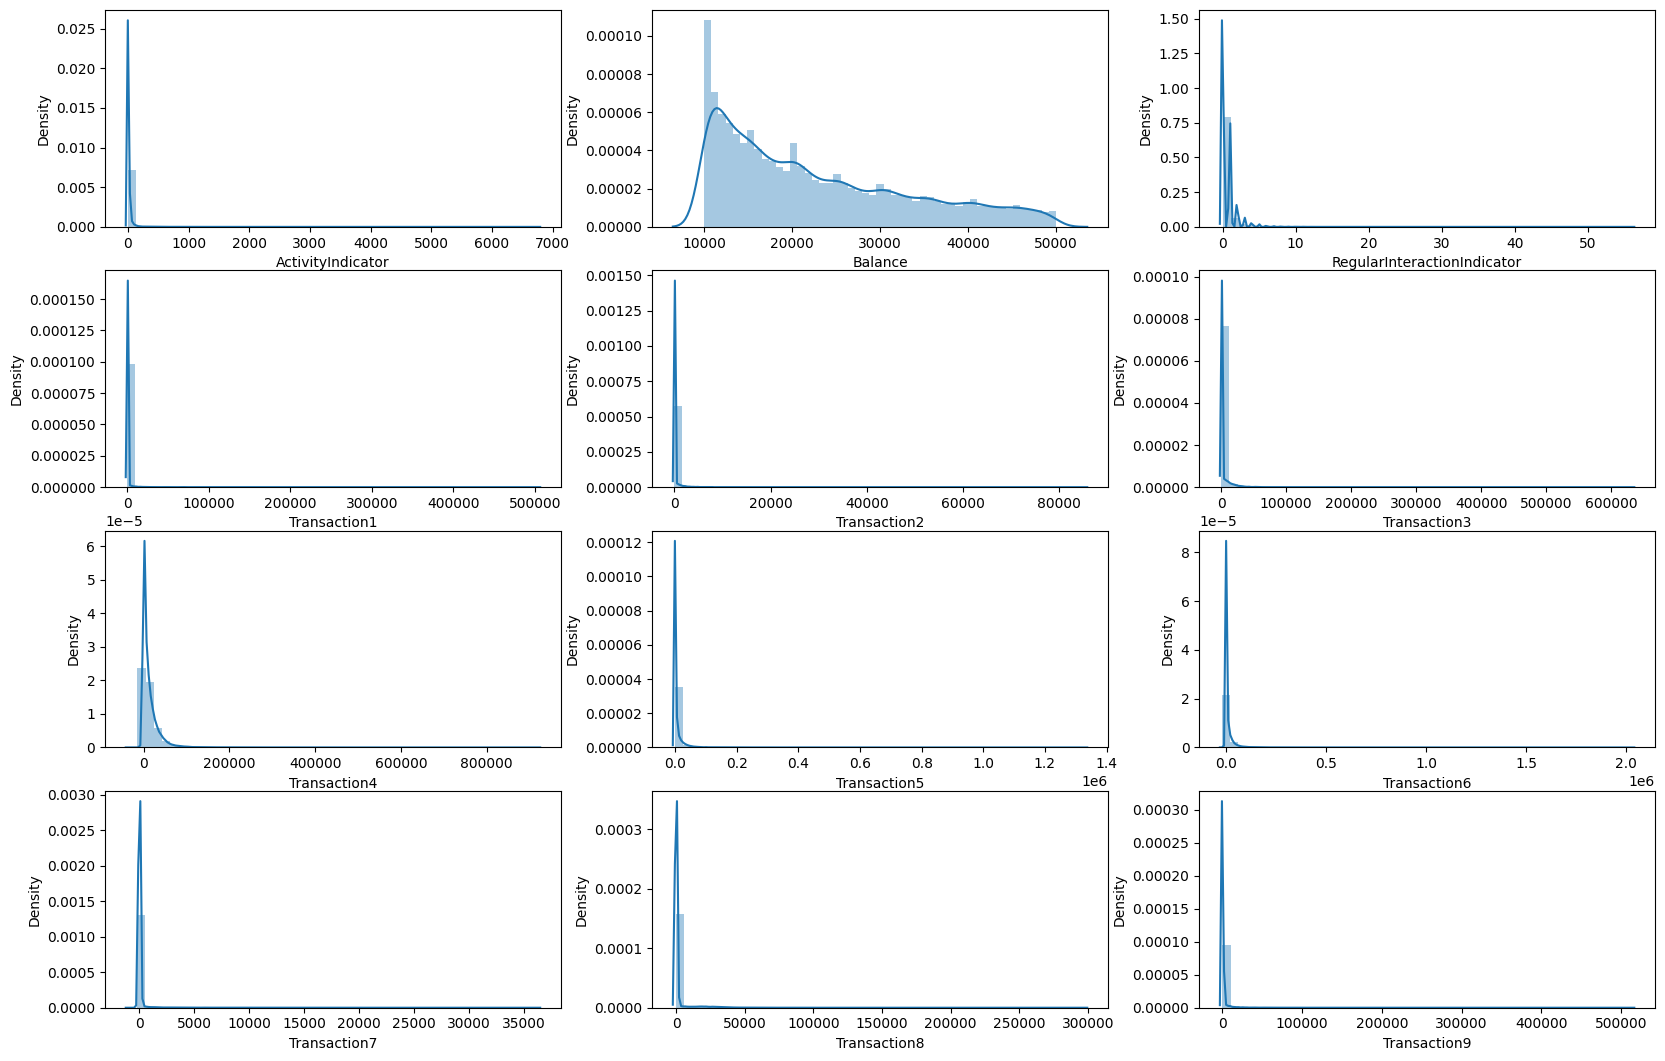

In [16]:
# Distribution of the continuous features.
plt.figure(figsize=(20, 40), facecolor = 'white')
plotnumber = 1

for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber += 1

plt.show()

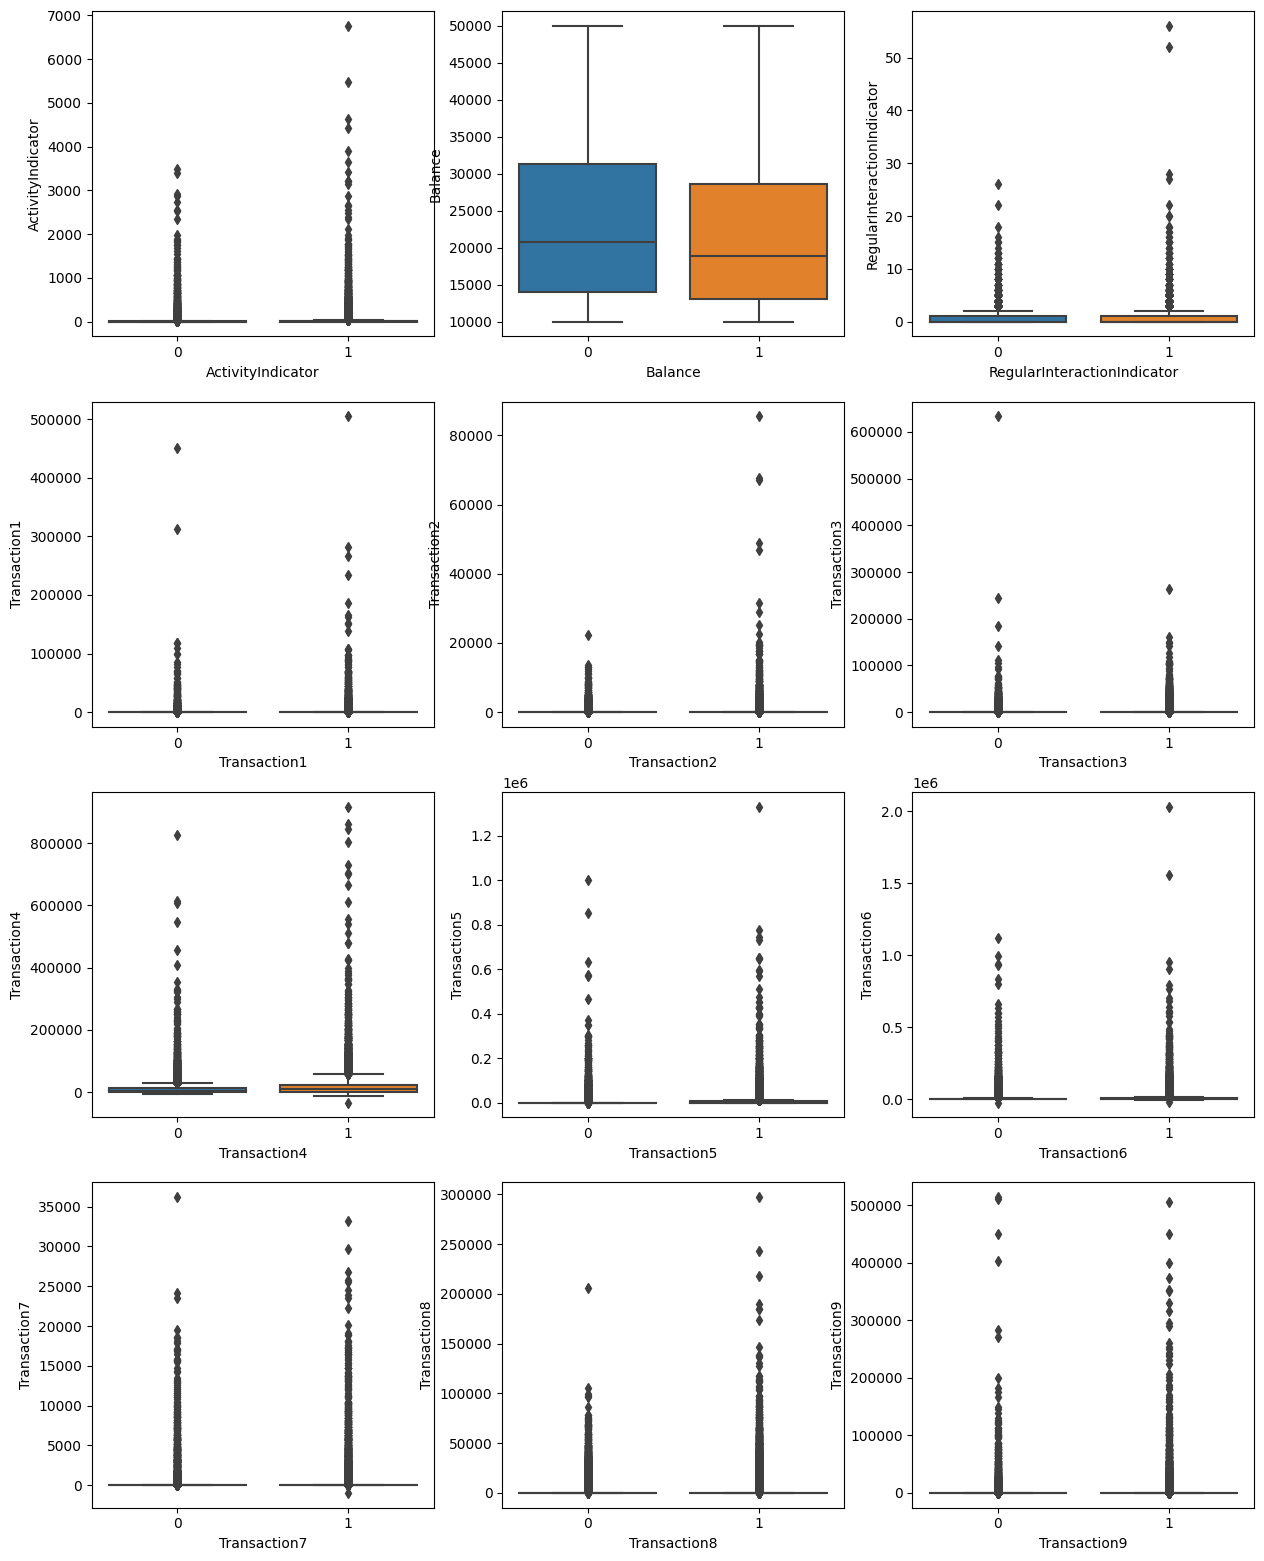

In [17]:
# Validating the numerical features using Box Plots with respect to Target field.
plt.figure(figsize = (15, 60), facecolor = 'white')
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = 'Target', y = df[feature], data = df)
    plt.xlabel(feature)
    plotnumber += 1

plt.show()

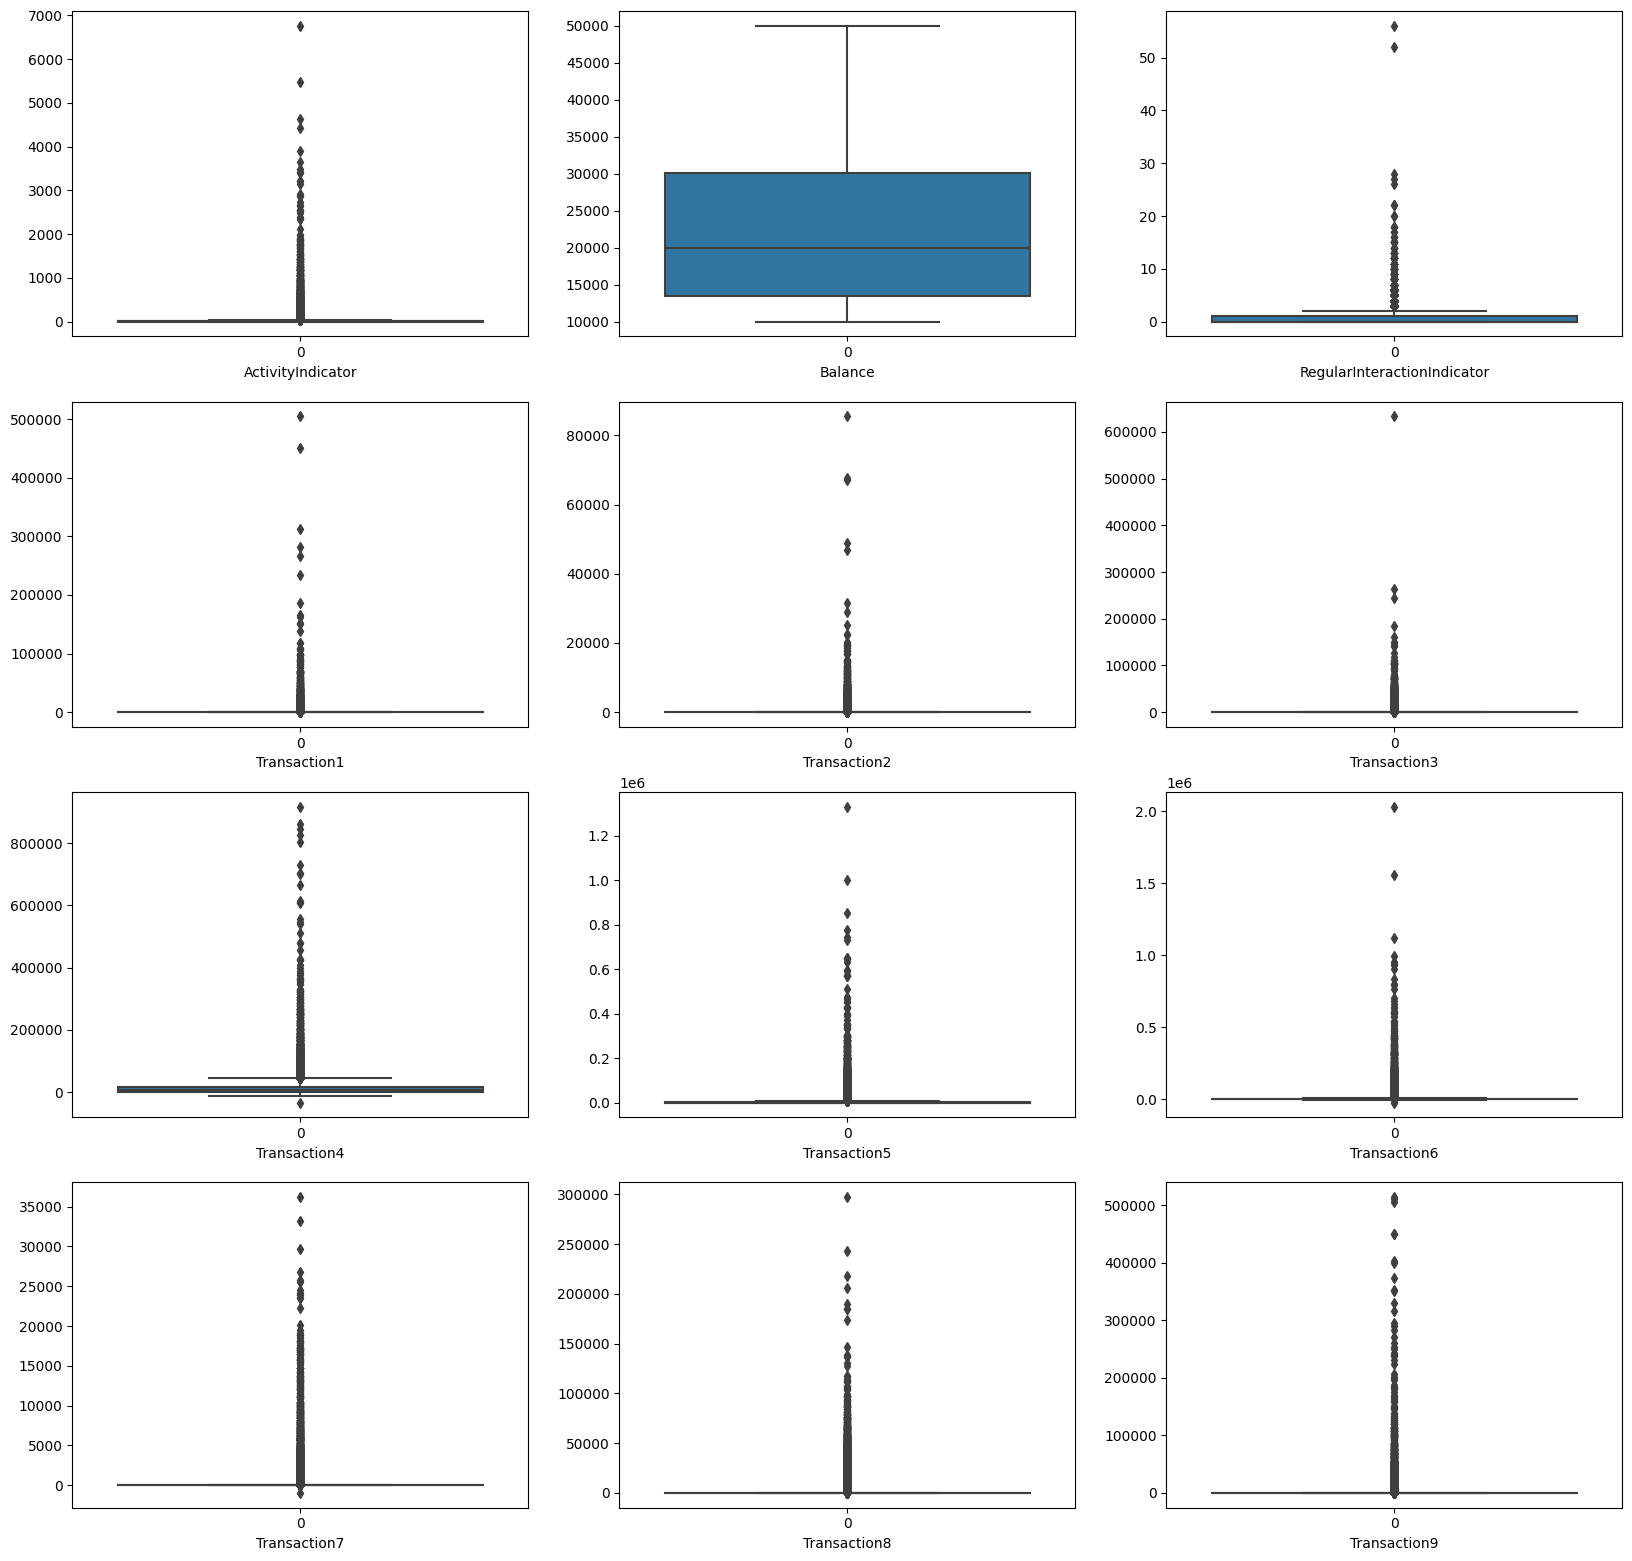

In [18]:
# Plotting Box Plot for individual Numerical Features.

plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1

for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber += 1

plt.show()

Correlation

<Axes: >

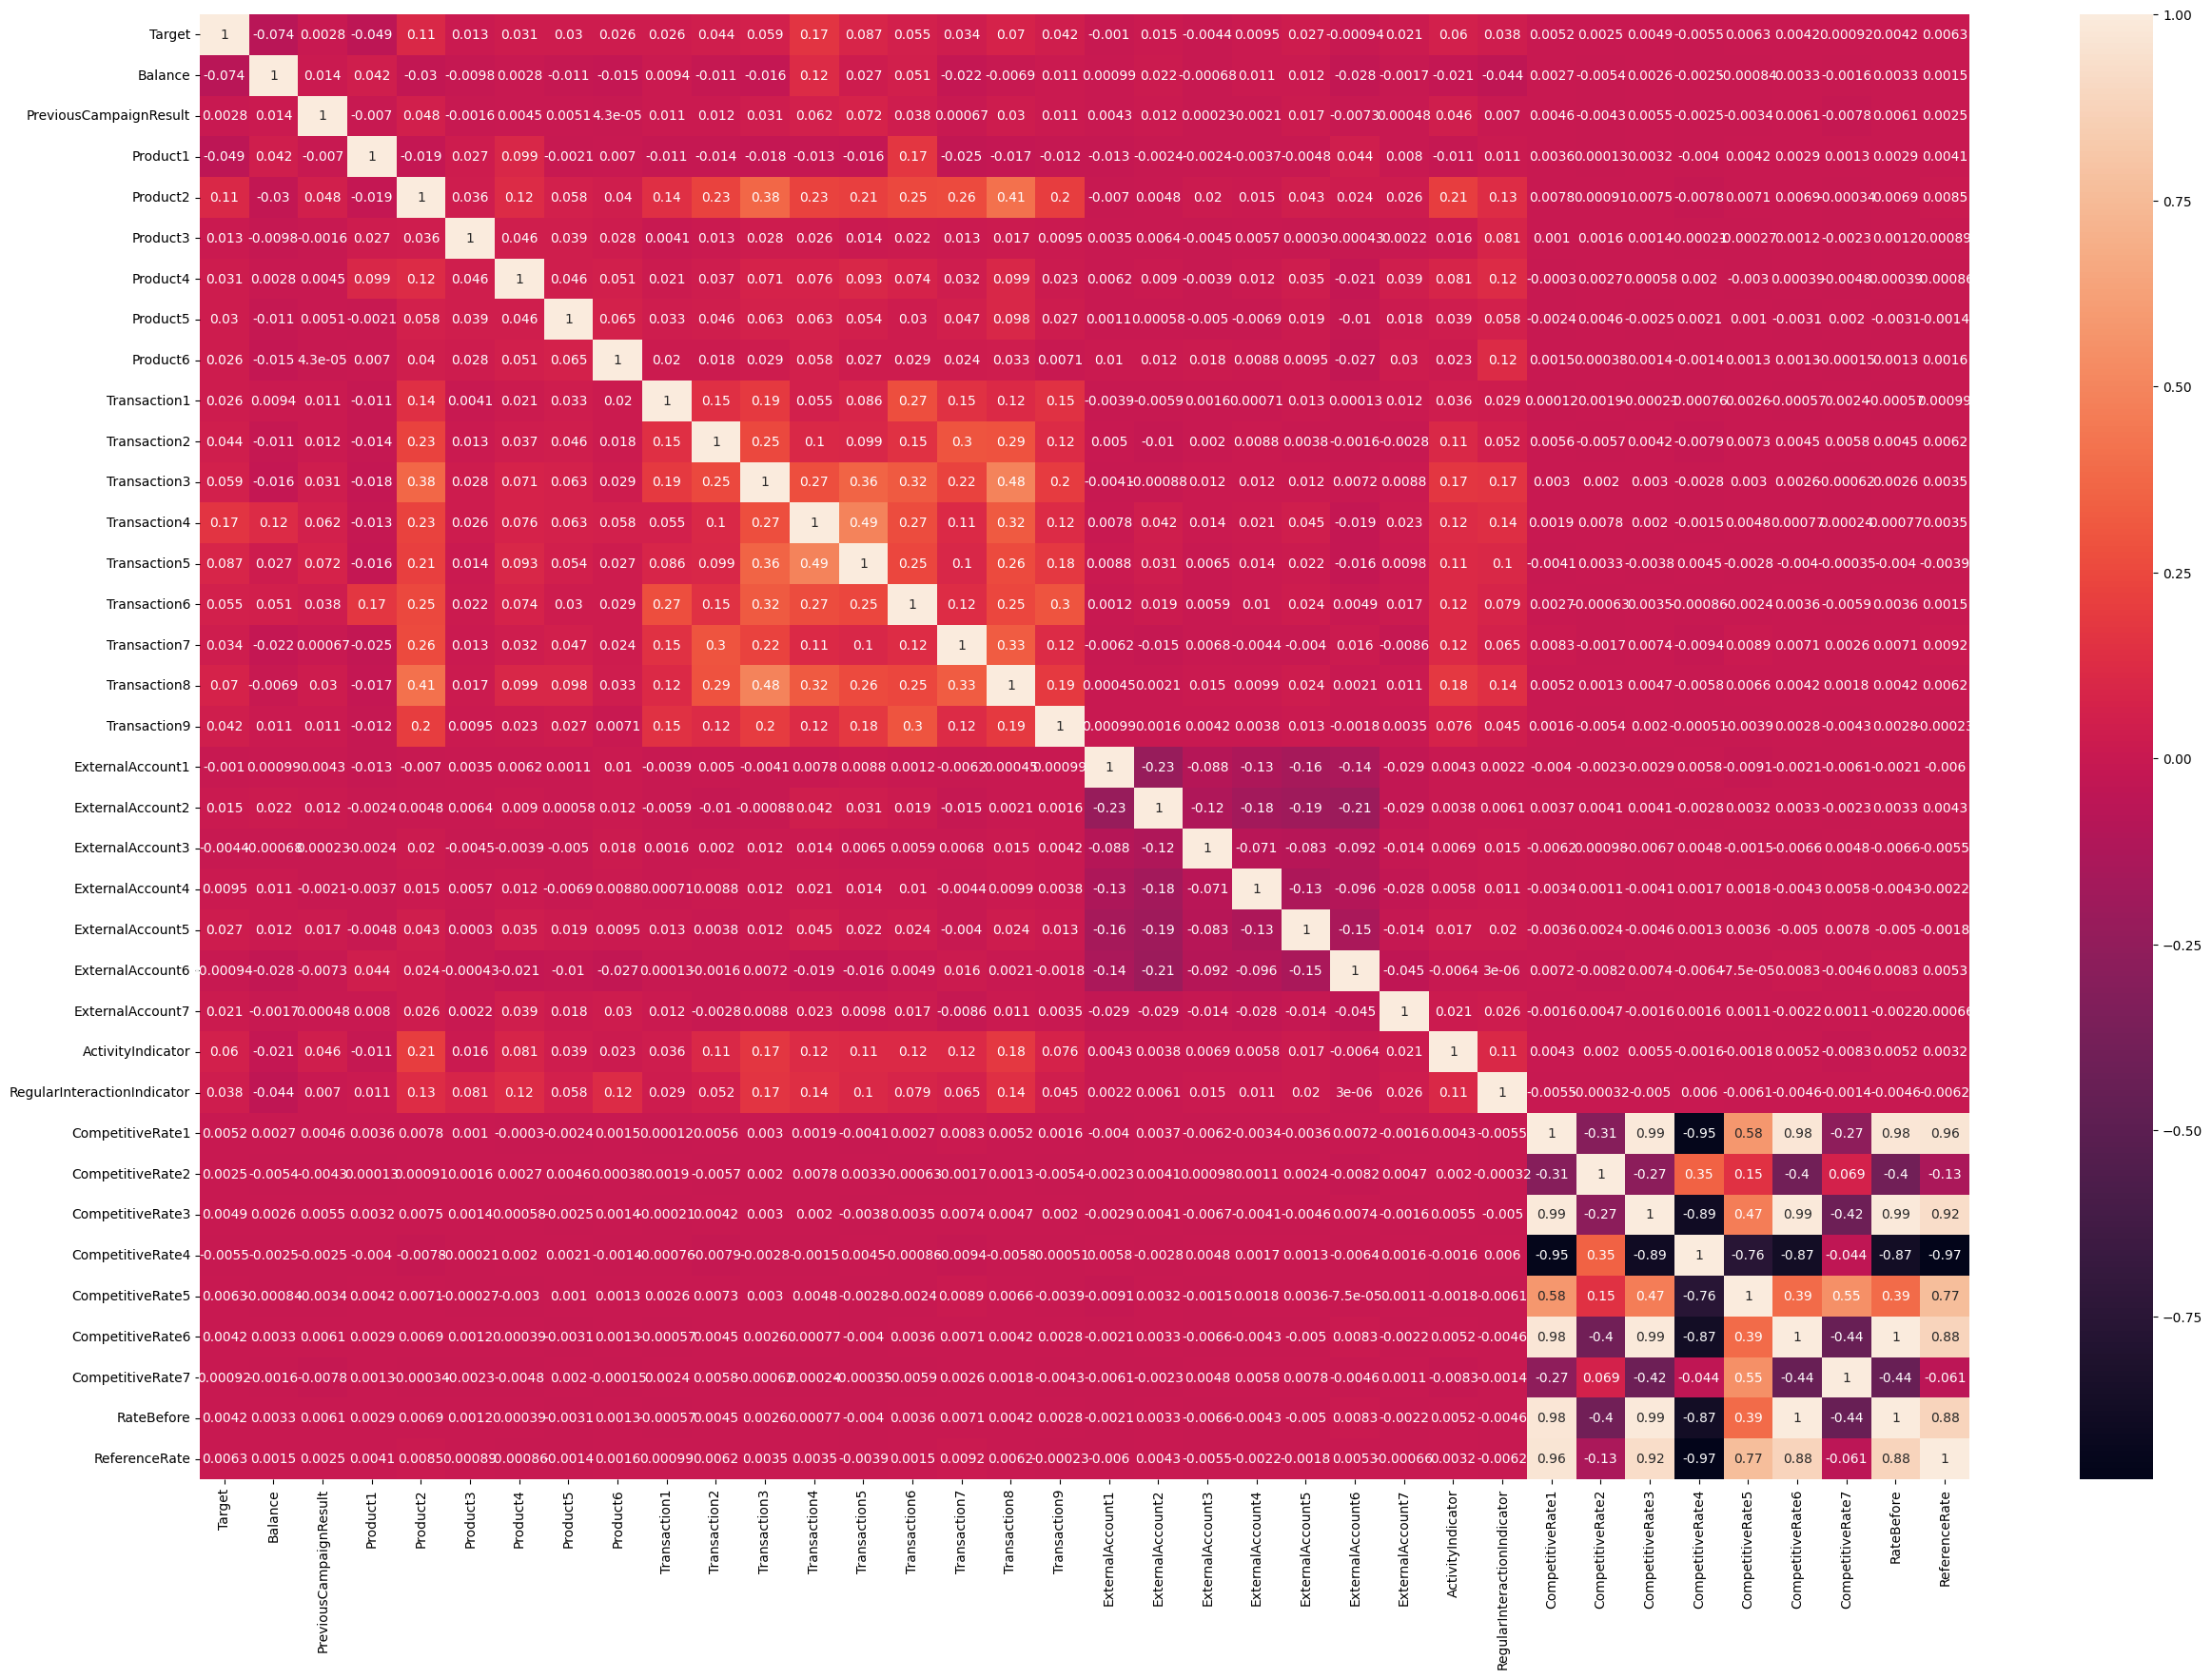

In [19]:
cor_mat = df.corr()
fig = plt.figure(figsize = (30, 20))
sns.heatmap(cor_mat, annot = True)

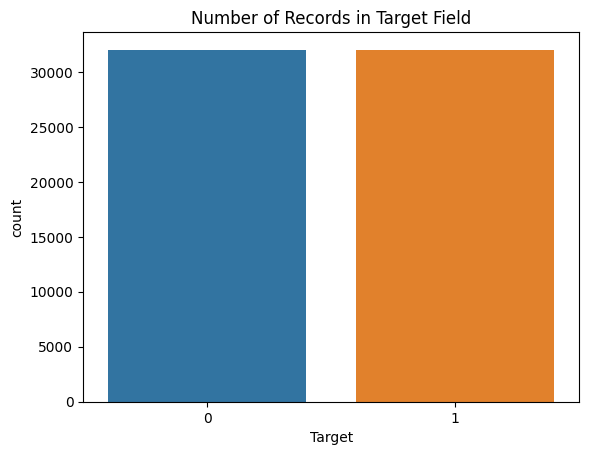

In [20]:
# Amount of data in Target column.
# Helps in understanding how equally balanced the dataset is.
sns.countplot(x = 'Target', data = df)
plt.title('Number of Records in Target Field')
plt.show()

<center><font color = '#FFA500' size = '8%'>Modeling</font></center>

In [21]:
#region Classification Metrics

def calculate_auc(y_true, y_pred_prob):
    """
    Calculate the Area Under the Curve (AUC) for a binary classification model.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_pred_prob (array-like): Predicted probabilities of the positive class.

    Returns:
    float: AUC score.
    """
    return roc_auc_score(y_true, y_pred_prob)

def calculate_precision(y_true, y_pred):
    """
    Calculate Precision for a classification model.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_pred (array-like): Predicted binary labels.

    Returns:
    float: Precision score.
    """
    return precision_score(y_true, y_pred)

def calculate_recall(y_true, y_pred):
    """
    Calculate Recall for a classification model.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_pred (array-like): Predicted binary labels.

    Returns:
    float: Recall score.
    """
    return recall_score(y_true, y_pred)

def calculate_f1_score(y_true, y_pred):
    """
    Calculate F1 Score for a classification model.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_pred (array-like): Predicted binary labels.

    Returns:
    float: F1 Score.
    """
    return f1_score(y_true, y_pred)

def calculate_accuracy(y_true, y_pred):
    """
    Calculate Accuracy for a classification model.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_pred (array-like): Predicted binary labels.

    Returns:
    float: Accuracy score.
    """
    return accuracy_score(y_true, y_pred)

#endregion

#region Regression Metrics

def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE) for a regression model.

    Parameters:
    - y_true (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.

    Returns:
    float: RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

def calculate_mae(y_true, y_pred):
    """
    Calculate Mean Absolute Error (MAE) for a regression model.

    Parameters:
    - y_true (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.

    Returns:
    float: MAE.
    """
    return mean_absolute_error(y_true, y_pred)

def calculate_mse(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE) for a regression model.

    Parameters:
    - y_true (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.

    Returns:
    float: MSE.
    """
    return mean_squared_error(y_true, y_pred)

def calculate_r2(y, y_pred):
    """
    Calculate  R-Squared for a regression model.

    Parameters:
    - X (array-like): Input features.
    - y (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.

    Returns:
    float: R-Squared.
    """

    return r2_score(y, y_pred)

def calculate_adjusted_r2(X, y, y_pred):
    """
    Calculate Adjusted R-Squared for a regression model.

    Parameters:
    - X (array-like): Input features.
    - y (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.

    Returns:
    float: Adjusted R-Squared.
    """
    n = X.shape[0]
    p = X.shape[1]

    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return adjusted_r2

#endregion

In [22]:
# Classification Metrics.
def print_classification_metrics(y_true, y_pred, y_pred_prob):
    """
    Print various classification evaluation metrics.

    # Parameters:
    - y_true (array-like): True binary labels.
    - y_pred (array-like): Predicted binary labels.
    - y_pred_prob (array-like): Predicted probabilities of the positive class.

    # Returns:
    None

    # Example:
    Assuming y_true and y_pred are your true and predicted labels and y_pred_prob is your predicted probabilities for binary classification.
    `print_classification_metrics(y_true, y_pred, y_pred_prob)`
    """
    print(f"AUC Score: {roc_auc_score(y_true, y_pred_prob)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

# Regression Metrics.
def print_regression_metrics(y_true, y_pred, X = None):
    """
    Print various regression evaluation metrics.

    # Parameters:
    - y_true (array-like): True regression labels.
    - y_pred (array-like): Predicted regression labels.
    - X (array-like, optional): Input features for calculating adjusted R-Squared.

    # Returns:
    None

    # Example:
    Assuming y_true and y_pred are your true and predicted labels, and X is your input features for regression (use None if not applicable).
    `print_regression_metrics(y_true, y_pred, X)`
    """
    print(f"RMSE: {calculate_rmse(y_true, y_pred)}")
    print(f"MAE: {calculate_mae(y_true, y_pred)}")
    print(f"MSE: {calculate_mse(y_true, y_pred)}")
    print(f"Adjusted R-Squared: {calculate_r2(y_true, y_pred)}")

    if X is not None:
        print(f"Adjusted R-Squared: {calculate_adjusted_r2(X, y_true, y_pred)}")

Splitting the data

In [23]:
X = df.drop(['Target'], axis = 1)
Y = df['Target']

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {Y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 42)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (63999, 35)
'y' shape: (63999,)


In [24]:
# Checking the dimensions of the dataset.
print(len(X_train))
print(len(X_test))

47999
16000


# XGBOOST classifier

In [25]:
pipeline_xgb = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
    ('model_xgb', XGBClassifier(objective = 'binary:logistic', learning_rate = 0.015, max_depth = 8, n_estimators = 50))])

In [26]:
pipeline_xgb

Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('std_scaler', StandardScaler()),
                ('model_xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.015, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [27]:
model_xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.015, max_depth = 8, n_estimators = 50)
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
model_xgb.score(X_test, Y_test)

0.62025

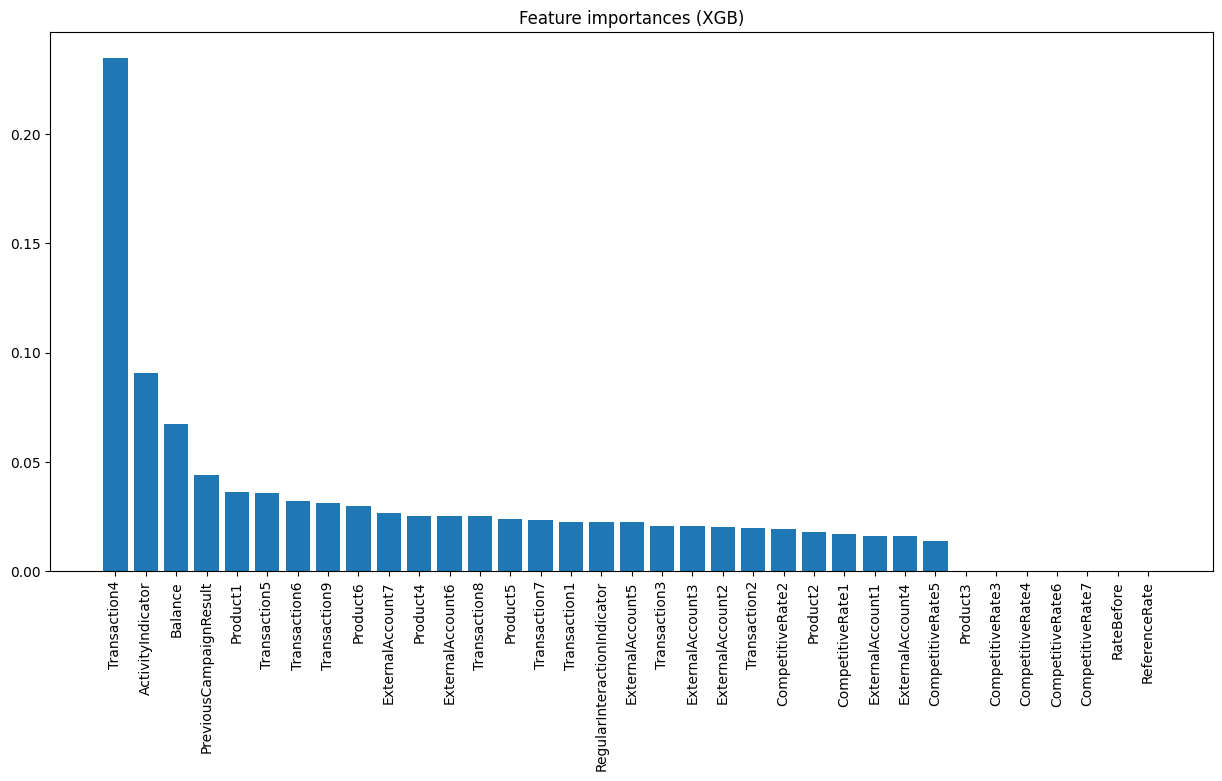

In [29]:
headers = ["name", "score"]
values = sorted(zip(df.drop(['Target'], axis = 1).columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

fig = plt.figure(figsize=(15, 7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation = 90)
plt.title('Feature importances (XGB)')

plt.show()

In [30]:
param_dist = {
    'max_depth' : stats.randint(3, 10),
    'learning_rate' : stats.uniform(0.01, 0.1),
    'subsample' : stats.uniform(0.5, 0.5),
    'n_estimators' : stats.randint(50, 100)
}

xg_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xg_model, param_distributions = param_dist, n_iter = 10, cv = 5, scoring = 'accuracy')
random_search.fit(X_train, Y_train)

# Print the best set of hyperparameters and the corresponding score.
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.10717125663207133, 'max_depth': 4, 'n_estimators': 83, 'subsample': 0.8629962236509308}
Best score:  0.6299298125672813


# RandomForest Classifier

In [31]:
model_score = cross_val_score(estimator = RandomForestClassifier(), X = X_train, y = Y_train, cv = 5)

print(model_score)
print(model_score.mean())

[0.59916667 0.59458333 0.60572917 0.59395833 0.59818731]
0.5983249622356496


In [32]:
# cat_columns = ['Customer_id']
# for col in  cat_columns:
#     df2 = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

Cross validation score of RF

In [33]:
model_score = cross_val_score(estimator = RandomForestClassifier(max_samples = 0.015,
                                                                 min_samples_split = 6,
                                                                 max_features = 8),
                              X = X_train,
                              y = Y_train,
                              cv = 5)

print(model_score)
print(model_score.mean())

[0.61989583 0.62395833 0.62729167 0.62177083 0.62475258]
0.6235338490120499


In [34]:
%%time

rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train, Y_train)

CPU times: user 11.8 s, sys: 138 ms, total: 11.9 s
Wall time: 12 s


RandomForestClassifier(n_estimators=150)

In [35]:
y_pred_rf = rf.predict(X_test)

In [36]:
accuracy = accuracy_score(Y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.59475


# NN Model

In [37]:
INPUT_NEURONS = X_train.shape[1]
OUTPUT_NEURONS = 1

MAX_LAYER = 8
ITER = 10
P_MAX = 20
BATCH_SIZE = 128
EPOCH = 20
NODE_CHANGE = 1

UPPER_LIMIT = INPUT_NEURONS + OUTPUT_NEURONS
LOWER_LIMIT = 0

PROPABILITY = 0.5

In [38]:
X = df.drop(['Target'], axis = 1)
Y = df['Target']

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {Y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 42)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (63999, 35)
'y' shape: (63999,)


In [39]:
batch_size = 128
num_classes = 1
epochs = 20

# Creating a sequential model here
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu', kernel_regularizer = keras.regularizers.l1(0.01)))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18432     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

In [40]:
%%time

model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5)
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.5, patience = 3, verbose = 1)

history = model.fit(X_train,
                    Y_train,
                    batch_size = 256,
                    epochs = 100,
                    validation_split = 0.25,
                    callbacks = [es, reduce_lr])

# history = model.fit(X_train, Y_train,
#                     batch_size = 256,
#                     epochs=100,
#                     verbose = 1,
#                     validation_split = 0.25)

Epoch 1/100
141/141 [==============================] - 11s 6ms/step - loss: 0.8439 - accuracy: 0.5934 - val_loss: 0.5713 - val_accuracy: 0.6210 - lr: 0.0010
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4025 - accuracy: 0.6210 - val_loss: 0.2758 - val_accuracy: 0.6230 - lr: 0.0010
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2449 - accuracy: 0.6203 - val_loss: 0.2354 - val_accuracy: 0.6226 - lr: 0.0010
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2350 - accuracy: 0.6241 - val_loss: 0.2353 - val_accuracy: 0.6199 - lr: 0.0010
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2344 - accuracy: 0.6241 - val_loss: 0.2342 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 6/100
141/141 [==============================] - 1s 5ms/step - loss: 0.2333 - accuracy: 0.6274 - val_loss: 0.2346 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 7/100
141/141 [==============================] - 1s 5ms/s

In [41]:
model.add(Dense(512, activation='relu', input_shape = X_train.shape[1 : ]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu', kernel_regularizer = keras.regularizers.l1(0.01)))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18432     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0

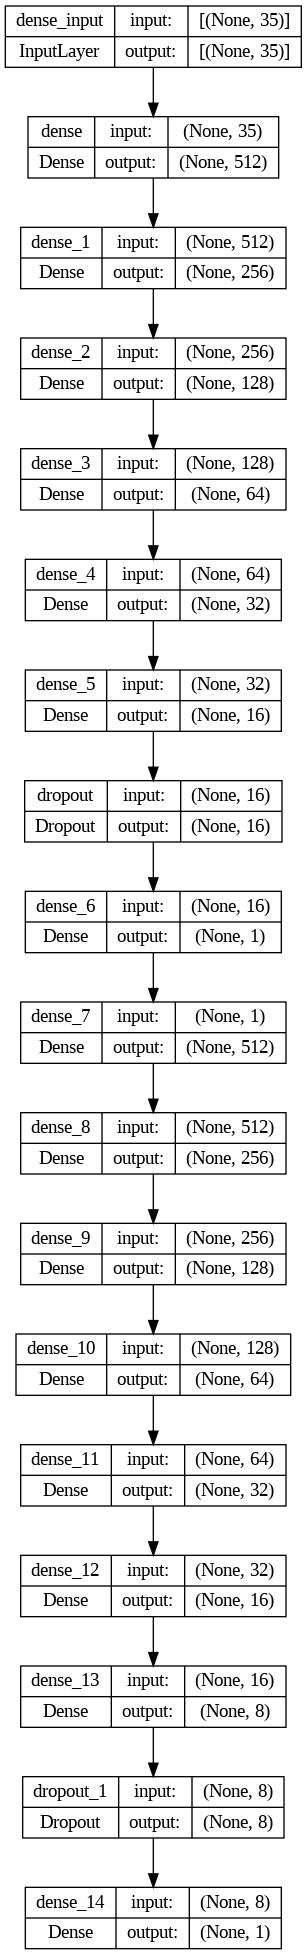

In [42]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [43]:
%%time

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5)
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.5, patience = 3, verbose = 1)

history = model.fit(X_train,
                    Y_train,
                    batch_size = 256,
                    epochs = 150,
                    validation_split = 0.25,
                    callbacks = [es, reduce_lr])

# history = model.fit(X_train, Y_train,
#                     batch_size=64,
#                     epochs=20,
#                     verbose=1,
#                     validation_split=0.25)

Epoch 1/150
141/141 [==============================] - 6s 13ms/step - loss: 0.7906 - accuracy: 0.7454 - val_loss: 0.6554 - val_accuracy: 0.5695 - lr: 0.0010
Epoch 2/150
141/141 [==============================] - 1s 8ms/step - loss: 0.3512 - accuracy: 0.7718 - val_loss: 0.3666 - val_accuracy: 0.5797 - lr: 0.0010
Epoch 3/150
141/141 [==============================] - 1s 7ms/step - loss: 0.1862 - accuracy: 0.7731 - val_loss: 0.3101 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 4/150
141/141 [==============================] - 1s 7ms/step - loss: 0.1629 - accuracy: 0.7743 - val_loss: 0.3069 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 5/150
141/141 [==============================] - 1s 7ms/step - loss: 0.1605 - accuracy: 0.7721 - val_loss: 0.3075 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 6/150
141/141 [==============================] - 1s 7ms/step - loss: 0.1540 - accuracy: 0.7770 - val_loss: 0.3126 - val_accuracy: 0.5765 - lr: 0.0010
Epoch 7/150
141/141 [==============================] - 1s 7ms/s

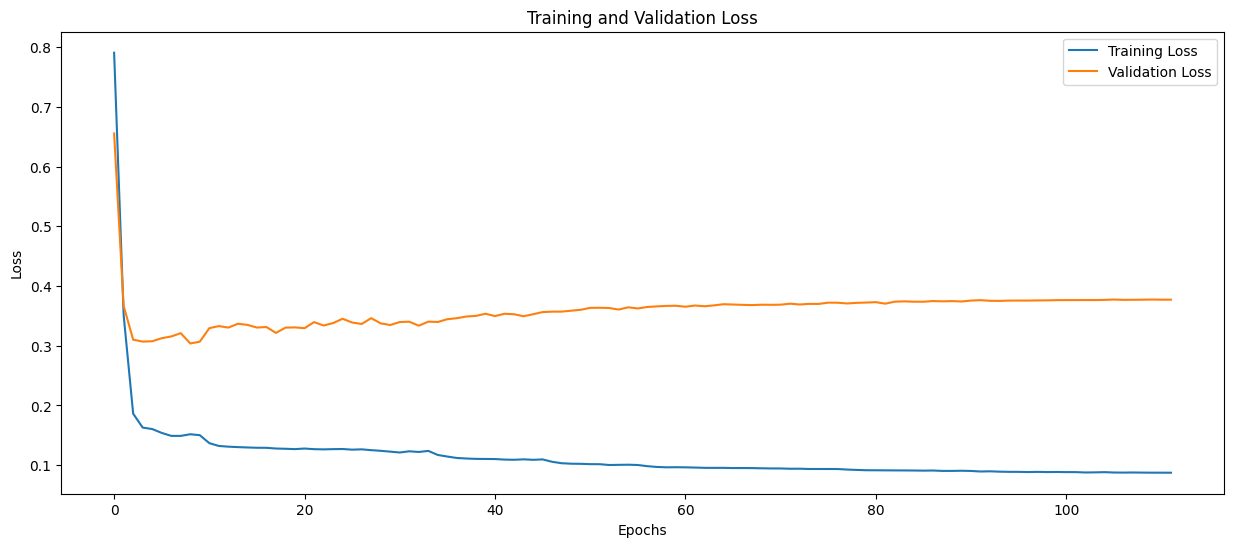

CPU times: user 264 ms, sys: 95.6 ms, total: 359 ms
Wall time: 251 ms


In [44]:
%%time

plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
y_pred_nn = model.predict(X_test)

500/500 [==============================] - 1s 2ms/step


In [46]:
# plt.plot(test_results['Train Predictions'][ : 200], label = 'Predicted Values')
# plt.plot(test_results['Actual'][ : 200], label = 'True Values')
# plt.legend()
# plt.show()

LSTM

In [47]:
# X_train = np.array(df.drop(['Target', axis = 1))
# Y_train = np.array(df['Target'])

In [48]:
X_train.ndim

2

<center><font color = '#FFA500' size = '6%'>Implementing Pipeline for Various Models</center></font>

In [49]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state = 42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT', DecisionTreeClassifier(random_state = 42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF', RandomForestClassifier(random_state = 42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state = 42))])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state = 42))])

In [50]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

lr_param_grid = [{ 'LR__penalty' : ['l1', 'l2'],
                   'LR__C' : param_range_fl,
                   'LR__solver' : ['liblinear'] }]

dt_param_grid = [{ 'DT__criterion' : ['gini', 'entropy'],
                   'DT__min_samples_leaf' : param_range,
                   'DT__max_depth' : param_range,
                   'DT__min_samples_split' : param_range[1 : ] }]

rf_param_grid = [{ 'RF__min_samples_leaf' : param_range,
                   'RF__max_depth' : param_range,
                   'RF__min_samples_split' : param_range[1 : ] }]

knn_param_grid = [{ 'KNN__n_neighbors' : param_range,
                    'KNN__weights' : ['uniform', 'distance'],
                    'KNN__metric' : ['euclidean', 'manhattan'] }]

svm_param_grid = [{ 'SVM__kernel' : ['linear', 'rbf'],
                    'SVM__C' : param_range }]

xgb_param_grid = [{ 'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators }]

In [51]:
# Grid Search.

lr_grid_search = GridSearchCV(estimator = pipe_lr,
                              param_grid = lr_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

dt_grid_search = GridSearchCV(estimator = pipe_dt,
                              param_grid = dt_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

rf_grid_search = GridSearchCV(estimator = pipe_rf,
                              param_grid = rf_param_grid,
                              scoring = 'accuracy',
                              cv = 3)

knn_grid_search = GridSearchCV(estimator = pipe_knn,
                               param_grid = knn_param_grid,
                               scoring = 'accuracy',
                               cv = 3)

svm_grid_search = GridSearchCV(estimator = pipe_svm,
                               param_grid = svm_param_grid,
                               scoring = 'accuracy',
                               cv = 3)

xgb_grid_search = GridSearchCV(estimator = pipe_xgb,
                               param_grid = xgb_param_grid,
                               scoring = 'accuracy',
                               cv = 3)

In [52]:
# Model Fitting.

%%time

grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, xgb_grid_search]

for pipe in grids:
    pipe.fit(X_train, Y_train)

CPU times: user 53min 6s, sys: 11.3 s, total: 53min 17s
Wall time: 37min 8s


In [53]:
# Predictions.

%%time

y_preds = []

for pipe in grids:
  y_preds.append(pipe.predict(X_train))

CPU times: user 2min 54s, sys: 300 ms, total: 2min 54s
Wall time: 1min 42s


In [54]:
# Probabilities.

%%time

y_probs = []

for pipe in grids:
  y_probs.append(pipe.predict_proba(X_train))

CPU times: user 2min 54s, sys: 241 ms, total: 2min 54s
Wall time: 1min 42s


Final Metrics/Scores.

In [55]:
# Models.
grid_dict = {
    0 : 'Logistic Regression',
    1 : 'Decision Trees',
    2 : 'Random Forest',
    3 : 'K-Nearest Neighbors',
    4 : 'XGBoost'
}

In [56]:
# Metrics and Scores.

for iteration in range(len(grids)):

  #region Print Decoration
  model_text = 'Model: ' + grid_dict[iteration]
  print('-' * (len(model_text)))
  print(model_text)
  print('-' * (len(model_text)))
  #endregion

  # Displaying the Metrics.
  print_regression_metrics(Y_train, y_preds[iteration], X_test)

  iteration += 1

--------------------------
Model: Logistic Regression
--------------------------
RMSE: 0.6180005043927187
MAE: 0.3819246234296548
MSE: 0.3819246234296548
Adjusted R-Squared: -0.5276984943817102
Adjusted R-Squared: -0.531047870935416
---------------------
Model: Decision Trees
---------------------
RMSE: 0.6107265650255104
MAE: 0.3729869372278589
MSE: 0.3729869372278589
Adjusted R-Squared: -0.49194774955900944
Adjusted R-Squared: -0.495218745000914
--------------------
Model: Random Forest
--------------------
RMSE: 0.6087619025368549
MAE: 0.37059105398029124
MSE: 0.37059105398029124
Adjusted R-Squared: -0.48236421656457895
Adjusted R-Squared: -0.4856142007527373
--------------------------
Model: K-Nearest Neighbors
--------------------------
RMSE: 0.0
MAE: 0.0
MSE: 0.0
Adjusted R-Squared: 1.0
Adjusted R-Squared: 1.0
--------------
Model: XGBoost
--------------
RMSE: 0.6032268071688308
MAE: 0.3638825808871018
MSE: 0.3638825808871018
Adjusted R-Squared: -0.45553032418017403
Adjusted R-Sq

In [57]:
%%time

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test, Y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.6155
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.619875
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.6225625
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 4}
K-Nearest Neighbors Test Accuracy: 0.558625
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
XGBoost Test Accuracy: 0.628125
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 3, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 100, 'XGB__subsample': 1.0}
CPU times: user 58.1 s, sys: 167 ms, total: 58.3 s
Wall time: 35.2 s


In [58]:
def plot_confusion_matrix(y_true, y_pred, classes_x, classes_y, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    '''
    Plot a confusion matrix.

    Parameters:
    - y_true (array-like): True labels of the data.
    - y_pred (array-like): Predicted labels of the data.
    - classes_x (list): List of class labels on x axis.
    - classes_y (list): List of class labels on y axis.
    - normalize (bool, optional): If True, normalize the confusion matrix. Default is False.
    - title (str, optional): Title of the plot. Default is 'Confusion Matrix'.
    - cmap (matplotlib colormap, optional): Colormap to be used for the plot. Default is plt.cm.Blues.

    Returns:
    - None: Displays the confusion matrix plot.

    Example:
    >>> y_true = [1, 0, 1, 2, 0, 1, 2, 2, 0]
    >>> y_pred = [1, 0, 2, 2, 0, 1, 2, 1, 0]
    >>> classes = ['Class 0', 'Class 1', 'Class 2']
    >>> plot_confusion_matrix(y_true, y_pred, classes, normalize=True, title='Normalized Confusion Matrix')
    '''
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[ : , np.newaxis]
        title = 'Normalized ' + title

    plt.figure(figsize = (6, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    plt.xticks(np.arange(len(classes_x)), classes_x, rotation = 45)
    plt.yticks(np.arange(len(classes_x)), classes_y)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

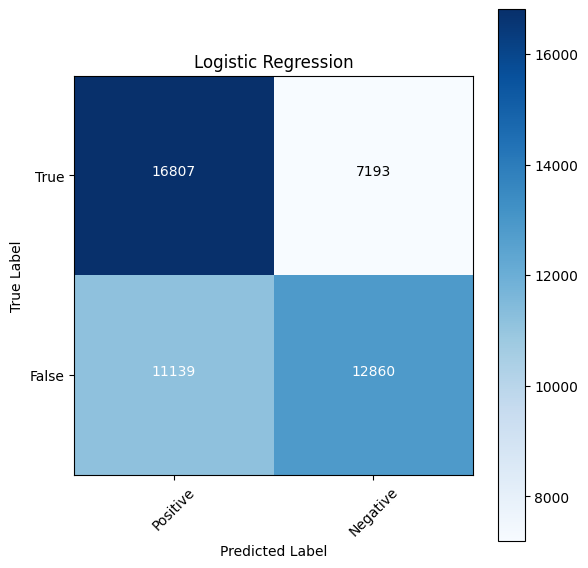

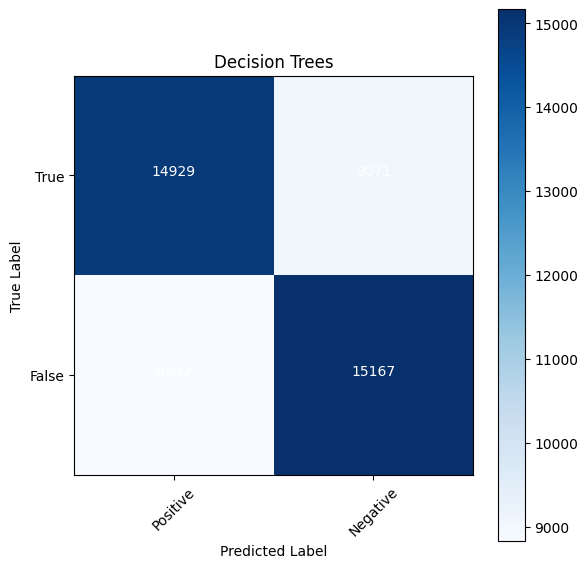

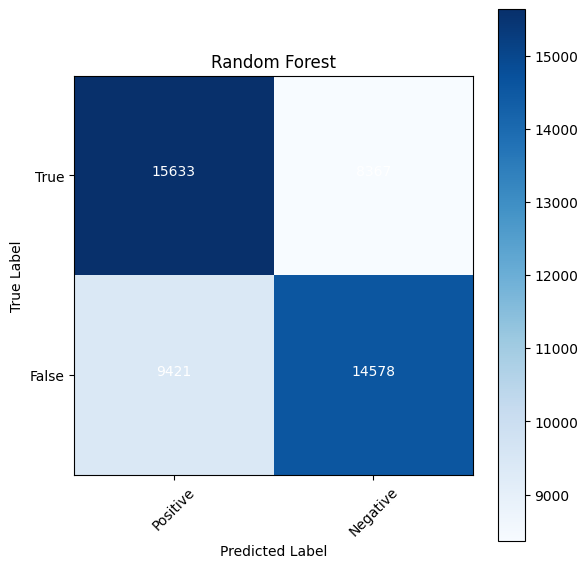

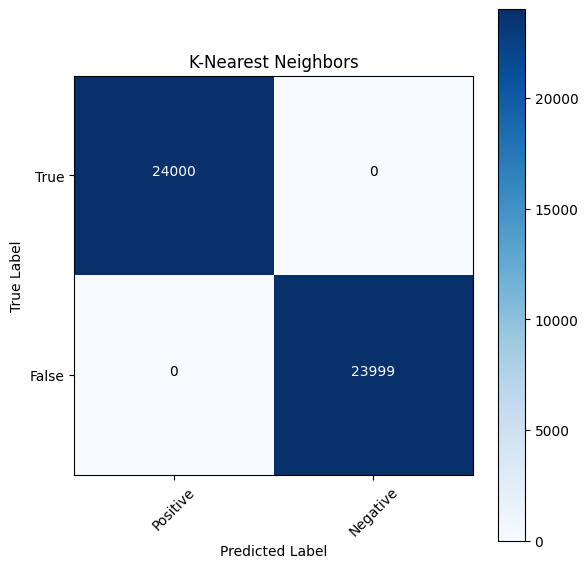

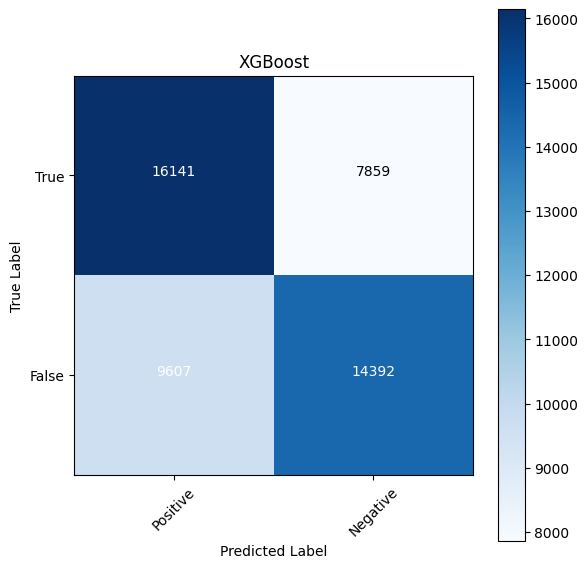

In [59]:
for iteration in range(len(grids)):
  model_name = grid_dict[iteration]
  plot_confusion_matrix(Y_train, y_preds[iteration], classes_x = ['Positive', 'Negative'], classes_y = ['True', 'False'], title = model_name)
  iteration += 1
  print()

In [70]:
# Exporting Predictions in a `.CSV` file.
ex_df = pd.read_csv('test.csv')
pd.DataFrame({ 'Customer_id' : ex_df.Customer_id.tolist(), 'Target' : grids[3].predict(ex_df.drop(['Customer_id'], axis = 1)) }).to_csv('Predictions.csv', index = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
